In [1]:
# import requests

# # URL of the file
# url = 'https://www.kaggle.com/datasets/zalando-research/fashionmnist/download?datasetVersionNumber=4'

# # Send an HTTP GET request
# response = requests.get(url)

# # Save the file to your system
# with open('archive.zip', 'wb') as f:
#     f.write(response.content)

# print('File downloaded successfully!')


In [2]:
import pandas as pd
df=pd.read_csv('fashion-mnist_train.csv')
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Display the first image in training data
  
Label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

for i in range(len(df)):
    df.loc[i,"Label"]= Label_dict[df.loc[i, "label"]]
df.head()
    


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Label
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pullover
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ankle boot
2,6,0,0,0,0,0,0,0,5,0,...,0,0,30,43,0,0,0,0,0,Shirt
3,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,T-shirt/top
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dress


```markdown
## P.3.1 Data Preprocessing

### Visualize the first 25 images with their appropriate label

The following code visualizes the first 25 images from the dataset along with their corresponding labels:


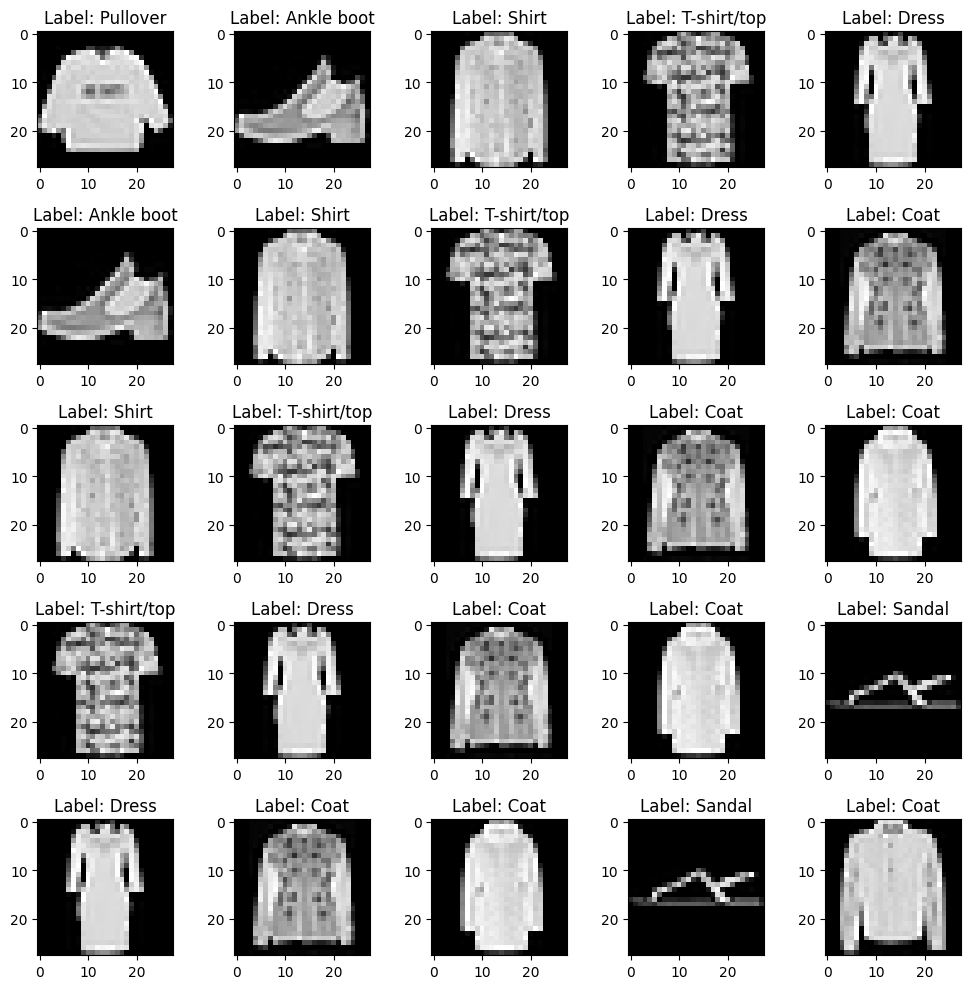

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Loop over each subplot and add the index (q)
q = 1
for i in range(5):
    for j in range(5):
       
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')

        axes[i, j].imshow(array.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()


```markdown
## 2. Perform Standard Scaling across the input features


```

## MIN-MAX Scaling
$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


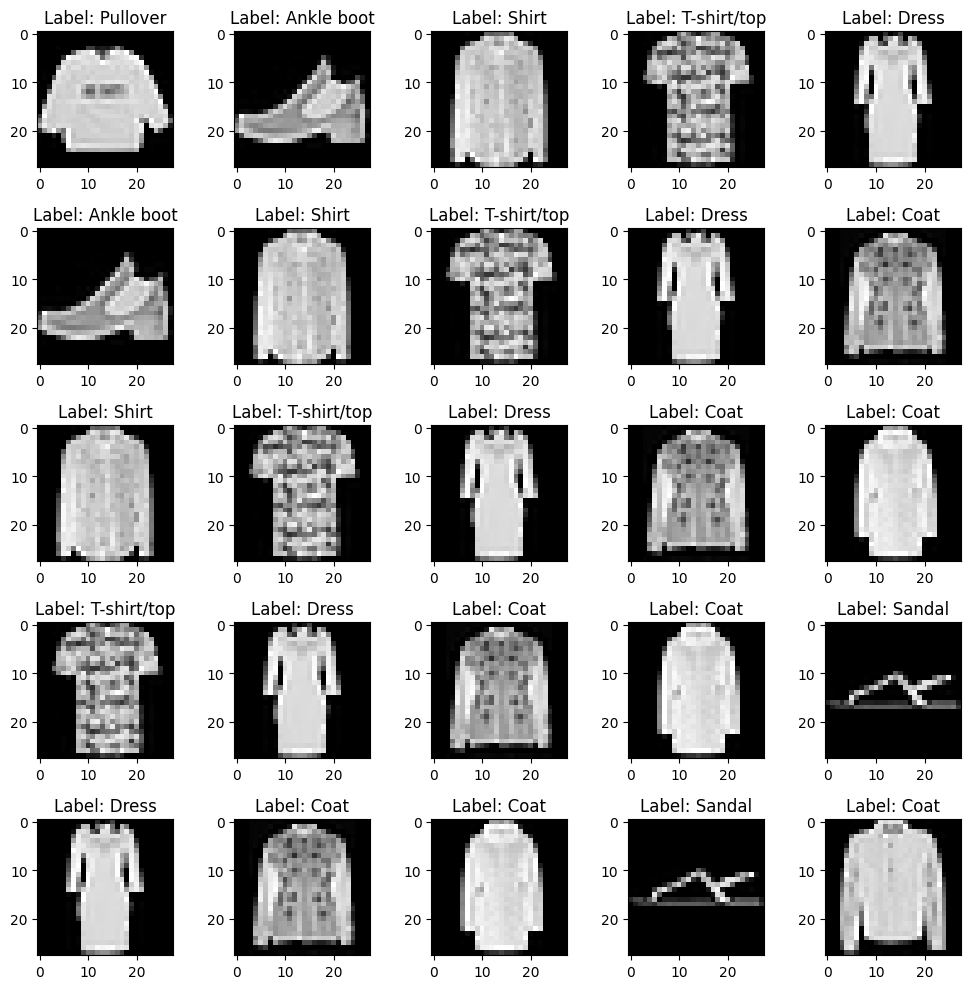

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Loop over each subplot and add the index (q)
q = 1
for i in range(5):
    for j in range(5):
        
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')
        array_scaled = (array-np.min(array))/((np.max(array)-np.min(array))) # min-max scaling
        axes[i, j].imshow(array_scaled.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()

del fig, axes, array, array_scaled

## Standard Scaling

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$


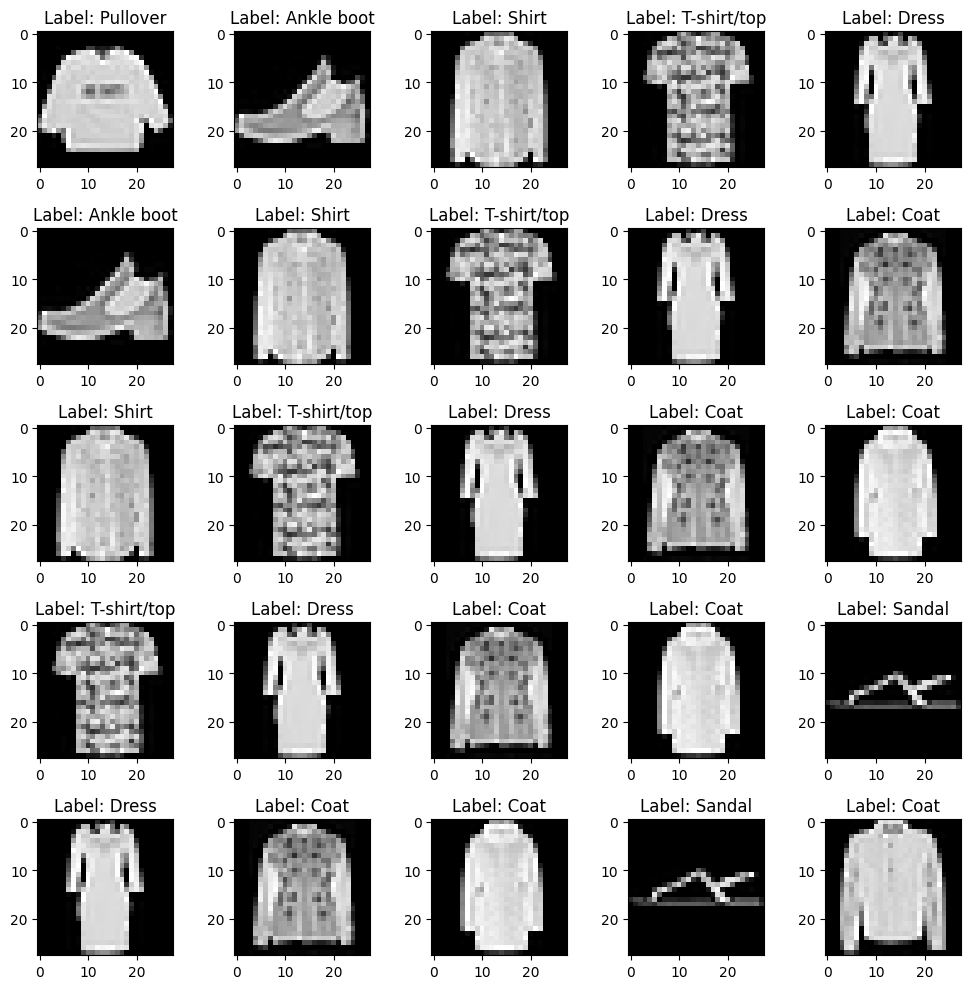

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))


# Loop over each subplot and add the index (q)
for i in range(5):
    for j in range(5):
        
        array = np.array(df.iloc[j+i, 1:-1].values,dtype='uint8')
        array_scaled = (array-np.mean(array))/(np.std(array)) # standard scaling
        axes[i, j].imshow(array_scaled.reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Label: {df.loc[j+i, "Label"]}')

plt.tight_layout()
plt.show()
del fig, axes, array, array_scaled

## Comment:
Min-Max Scaling is better for grayscale image data since the range of pixel values is already fixed between 0 and 255. In this case, the goal is to rescale these values to a new range, such as [0, 1], while preserving the original relationships between the pixel intensities. Min-Max Scaling effectively accomplishes this without distorting the data, making it ideal for tasks like image classification or training neural networks.

Standard Scaling, on the other hand, is better suited when the data contains a wide range of values and potential outliers. However, since grayscale images do not typically contain extreme outliers and are already within a well-defined range, Min-Max Scaling is a more appropriate choice.

## 3 Perform a Principal Component Analysis of the input data following the steps from the Lecture
## Notebook. Comment on the obtained results.

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio



def plot_3d_pca(X, y, target_names=None):
    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Combine the PCA results and target labels
    data = np.column_stack((X_pca, y))

    # Create a DataFrame with column names
    columns = ['PC1', 'PC2', 'PC3', 'label']
    df = pd.DataFrame(data, columns=columns)
    df['label'] = df['label'].astype(int)

    if target_names is not None:
        df['label_name'] = df['label'].apply(lambda x: target_names[x])
        color_col = 'label_name'
    else:
        color_col = 'label'

    # Create the interactive 3D plot
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=color_col, symbol=color_col, text=color_col,
                        labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})

    # Customize the plot appearance
    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3',
        ),
    )

    # Show the plot
    #fig.show()

    pio.write_html(fig, file="./MLP_gaussian/3d_pca_plot.html", auto_open=True)

    # files.download("3d_pca_plot.html")

    return fig

In [8]:
# X = np.array(df.iloc[1:, 1:-1].values,dtype='uint8')
# y = np.array(df.iloc[1:, 0].values,dtype='uint8')
# fig = plot_3d_pca(X, y, target_names=[0,1,2,3,4,5,6,7,8,9])

## comment
In the 3D PCA analysis of the fashion dataset, we can distinguish three distinct clusters based on item categories:

1. **Upper Body Clothing**: This cluster includes coats, T-shirts, and shirts, which share common characteristics related to upper body fashion.

2. **Bottom Wear**: This cluster encompasses trousers and pants, highlighting the unique attributes that differentiate lower body garments.

3. **Footwear**: This cluster consists of sandals, sneakers, and ankle boots, emphasizing the distinct features of footwear items.

The clear separation of these clusters indicates that PCA effectively captured the fundamental differences between these fashion categories, providing valuable insights for further analysis and classification in fashion-related applications.


## P.3.2  Training MNIST Fashion
Implement a two hidden layer network with the following suggested hyper-parameters (please
notice that you can choose to use your own set of hyper-parameters) and instructions, and plot the resulting
learning curves for the training process (loss and accuracy for both training and validation datasets):
• Hidden Layer Sizes: (2000, 2000)
• Hidden layers activation: ReLU: You can as well explore a activation function of your choice
• output activation: softmax activation. Please use this activation as it is strongly suggested.

In [12]:
%load_ext autoreload
%autoreload 2

from NN import *

from sklearn.model_selection import train_test_split
X=np.array(df.iloc[1:,1:-1].values,dtype='uint8')
y=np.array(df.iloc[1:,0].values,dtype='uint8')
print(X.shape)
print(y.shape)
X_temp,X_test,y_temp,y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)

print(f"X_train_shape: {X_train.shape}")
print(f"X_valid_shape: {X_valid.shape}")

del X_temp, y_temp, X, y

model = MLP(num_features=784, hidden_layers=[2000, 2000], num_classes=10)

loss_data=[]

def train_mlp(model, X_train, y_train, num_epochs=100, batch_size=32):
    def int_to_onehot(y, num_classes):
        onehot = np.zeros((len(y), num_classes))
        onehot[np.arange(len(y)), y] = 1
        return onehot

    num_samples = X_train.shape[0]
    
    for epoch in range(num_epochs):
        # Shuffle data
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        # Mini-batch training
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            
            model.backward(X_batch, y_batch)

            

        # Compute and print the loss at the end of each epoch
        
        output = model.forward(X_train)
        loss = model.compute_loss(output, int_to_onehot(y_train, model.num_classes))
        loss_data.append({"epoch":epoch+1,"loss":loss})
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}')
dff=pd.DataFrame(loss_data)
train_mlp(model, X_train, y_train, num_epochs=50, batch_size=1024)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(59999, 784)
(59999,)


X_train_shape: (44999, 784)
X_valid_shape: (5000, 784)
Model initialization
Model initialized with He and Xavier initialization.
Epoch 1/50, Loss: 0.9239
Epoch 2/50, Loss: 0.7655
Epoch 3/50, Loss: 0.6926
Epoch 4/50, Loss: 0.6473
Epoch 5/50, Loss: 0.6145
Epoch 6/50, Loss: 0.5938
Epoch 7/50, Loss: 0.5723
Epoch 8/50, Loss: 0.5565
Epoch 9/50, Loss: 0.5440
Epoch 10/50, Loss: 0.5321
Epoch 11/50, Loss: 0.5232
Epoch 12/50, Loss: 0.5135
Epoch 13/50, Loss: 0.5069
Epoch 14/50, Loss: 0.5016
Epoch 15/50, Loss: 0.4929
Epoch 16/50, Loss: 0.4882
Epoch 17/50, Loss: 0.4820
Epoch 18/50, Loss: 0.4777
Epoch 19/50, Loss: 0.4743
Epoch 20/50, Loss: 0.4693
Epoch 21/50, Loss: 0.4642
Epoch 22/50, Loss: 0.4601
Epoch 23/50, Loss: 0.4572
Epoch 24/50, Loss: 0.4537
Epoch 25/50, Loss: 0.4507
Epoch 26/50, Loss: 0.4478
Epoch 27/50, Loss: 0.4446
Epoch 28/50, Loss: 0.4445
Epoch 29/50, Loss: 0.4393
Epoch 30/50, Loss: 0.4365
Epoch 31/50, Loss: 0.4350
Epoch 32/50, Loss: 0.4321
Epoch 33/50, Loss: 0.4321
Epoch 34/50, Loss: 0.4

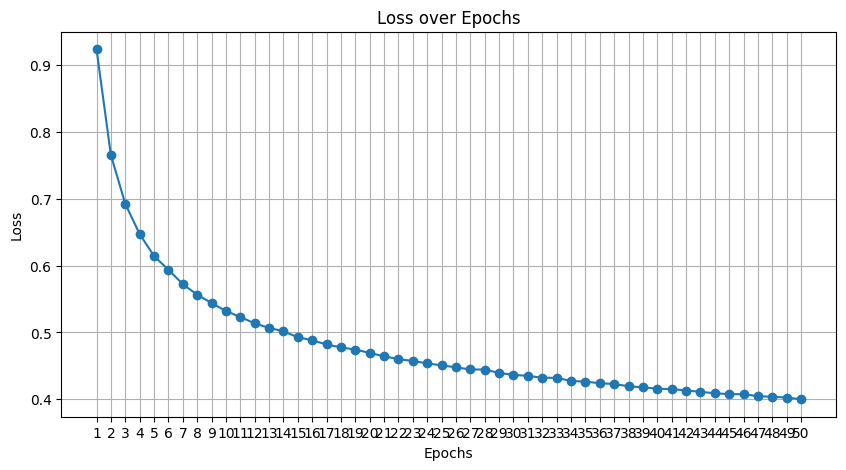

In [13]:
for entry in loss_data:
    entry["loss"] = float(entry["loss"])

# Extracting values for plotting
epochs = [entry["epoch"] for entry in loss_data]
losses = [entry["loss"] for entry in loss_data]

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)  # Ensure all epochs are shown on the x-axis
plt.grid()
plt.show()

In [14]:
def compute_accuracy(model, X_test, y_test):
    """
    Compute the accuracy of the model on the test dataset.

    Parameters:
    model: The trained model.
    X_test: Test data features.
    y_test: True labels for the test data.

    Returns:
    accuracy: The accuracy of the model as a percentage.
    """
    # Forward pass through the model to get output probabilities
    output = model.forward(X_test)  # Shape: (num_samples, num_classes)
    
    # Get predicted class labels (the index of the highest probability)
    predictions = np.argmax(output, axis=1)
    print("predictions",predictions)
    
    # Compute accuracy
    accuracy = np.mean(predictions == y_test) * 100  
    return accuracy


In [15]:

accuracy = compute_accuracy(model, X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}%')


predictions [8 0 7 ... 8 4 4]
Test Accuracy: 85.71%


## P.3.2.2
Implement a k-fold cross validation procedure. Clearly explain what you did and comment the
procedure and obtained results.


In [16]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd


X = np.array(df.iloc[1:, 1:-1].values, dtype='uint8')
y = np.array(df.iloc[1:, 0].values, dtype='uint8')
print(X.shape)
print(y.shape)

# Parameters for k-fold
num_folds = 5  # Number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

loss_data = []

def train_mlp(model, X_train, y_train, num_epochs=100, batch_size=32):
    def int_to_onehot(y, num_classes):
        onehot = np.zeros((len(y), num_classes))
        onehot[np.arange(len(y)), y] = 1
        return onehot

    num_samples = X_train.shape[0]

    for epoch in range(num_epochs):
        # Shuffle data
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        # Mini-batch training
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            model.backward(X_batch, y_batch)

        # Compute and print the loss at the end of each epoch
        output = model.forward(X_train)
        loss = model.compute_loss(output, int_to_onehot(y_train, model.num_classes))
        loss_data.append({"epoch": epoch + 1, "loss": loss})
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}')


# K-Fold Cross-Validation
for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"\nTraining on Fold {fold + 1}/{num_folds}")
    X_train, X_valid = X[train_idx], X[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]

    model = MLP(num_features=784, hidden_layers=[2000, 2000], num_classes=10)  # Re-initialize the model for each fold
    train_mlp(model, X_train, y_train, num_epochs=50, batch_size=1024)

# Convert loss_data to DataFrame
loss_df = pd.DataFrame(loss_data)


(59999, 784)
(59999,)

Training on Fold 1/5
Model initialization
Model initialized with He and Xavier initialization.
Epoch 1/50, Loss: 0.9068
Epoch 2/50, Loss: 0.7560
Epoch 3/50, Loss: 0.6841
Epoch 4/50, Loss: 0.6377
Epoch 5/50, Loss: 0.6086
Epoch 6/50, Loss: 0.5826
Epoch 7/50, Loss: 0.5647
Epoch 8/50, Loss: 0.5490
Epoch 9/50, Loss: 0.5382
Epoch 10/50, Loss: 0.5255
Epoch 11/50, Loss: 0.5166
Epoch 12/50, Loss: 0.5097
Epoch 13/50, Loss: 0.5011
Epoch 14/50, Loss: 0.4948
Epoch 15/50, Loss: 0.4899
Epoch 16/50, Loss: 0.4842
Epoch 17/50, Loss: 0.4779
Epoch 18/50, Loss: 0.4728
Epoch 19/50, Loss: 0.4689
Epoch 20/50, Loss: 0.4638
Epoch 21/50, Loss: 0.4600
Epoch 22/50, Loss: 0.4574
Epoch 23/50, Loss: 0.4532
Epoch 24/50, Loss: 0.4498
Epoch 25/50, Loss: 0.4469
Epoch 26/50, Loss: 0.4442
Epoch 27/50, Loss: 0.4408
Epoch 28/50, Loss: 0.4389
Epoch 29/50, Loss: 0.4365
Epoch 30/50, Loss: 0.4379
Epoch 31/50, Loss: 0.4305
Epoch 32/50, Loss: 0.4295
Epoch 33/50, Loss: 0.4264
Epoch 34/50, Loss: 0.4247
Epoch 3

In [18]:
for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"\nTraining on Fold {fold + 1}/{num_folds}")
    X_train, X_valid = X[train_idx], X[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]
    accuracy = compute_accuracy(model, X_valid, y_valid)
    print(f'Test Accuracy: {accuracy:.2f}%')


Training on Fold 1/5


predictions [6 8 0 ... 5 9 8]
Test Accuracy: 86.95%

Training on Fold 2/5
predictions [4 0 8 ... 6 9 4]
Test Accuracy: 87.11%

Training on Fold 3/5
predictions [2 4 5 ... 4 5 4]
Test Accuracy: 86.58%

Training on Fold 4/5
predictions [0 3 5 ... 5 5 8]
Test Accuracy: 87.10%

Training on Fold 5/5
predictions [7 6 2 ... 9 1 7]
Test Accuracy: 85.92%
